# Barplot consistency cancer types

In [1]:
# Imports

%load_ext autoreload
%autoreload 2

import io
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pysam
import warnings
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix

# set working directory
if not os.getcwd().endswith('cfdna_snv_benchmark'):
    os.chdir('../')
print('Current working directory: {}'.format(os.getcwd()))

from utils.config import Config
from utils.viz import *
from benchmark.table import *
from benchmark.metrics import *
from benchmark.calltable import *
from benchmark.calltableseries import *
from benchmark.groundtruth import *
from benchmark.metricsseries import *
#from utils.venn import venn6, get_labels

Current working directory: /Users/hanae/Repositories/cfdna_snv_benchmark


In [2]:
# Config and Display paramaters

config = Config("config/", "config_viz.yaml")
set_display_params(config)
print(config.methods)

paper
['freebayes', 'mutect2', 'strelka2', 'vardict', 'varscan', 'smurf', 'varnet', 'abemus', 'sinvict']


In [8]:
# Chomosome

mixtureids =  ['CRC-986_100215-CW-T_CRC-986_300316-CW-T', 'CRC-1014_180816-CW-T_CRC-1014_090516-CW-T', 'CRC-123_310715-CW-T_CRC-123_121115-CW-T', 'BRA-412_240820-CW-T_BRA-412_060220-CW-T']
mixtureid = 'CRC-986_100215-CW-T_CRC-986_300316-CW-T'
#mixtureid = 'CRC-1014_180816-CW-T_CRC-1014_090516-CW-T'
#mixtureid = 'CRC-123_310715-CW-T_CRC-123_121115-CW-T'
#mixtureid = 'BRA-412_240820-CW-T_BRA-412_060220-CW-T'
reload = False
save = False
fixedvars=['coverage', 'ctdna']
filterparam = 'all'

markers = ['o', '^', 'X']
linestyles = ['-', '-', '-']
color_dict = {config.methods[i]: config.colors[i] for i in range(len(config.methods))}

muttypes = ['snv', 'indel']
metrics = ['auprc', 'precision', 'recall']

chrom = 'all'

# INDELS: patient 986 = 96, patient 123 = 357, patient 1014 = 277 (≥ 4/6 callers without SMURF)

# Part I: (1) Load/Generate call tables, (2) Generate Ground truths and (3) Compute/Save metrics per patient

In [77]:
muttype = 'snv'
metric = 'auprc' #'maxrecallatleast0_03precision'

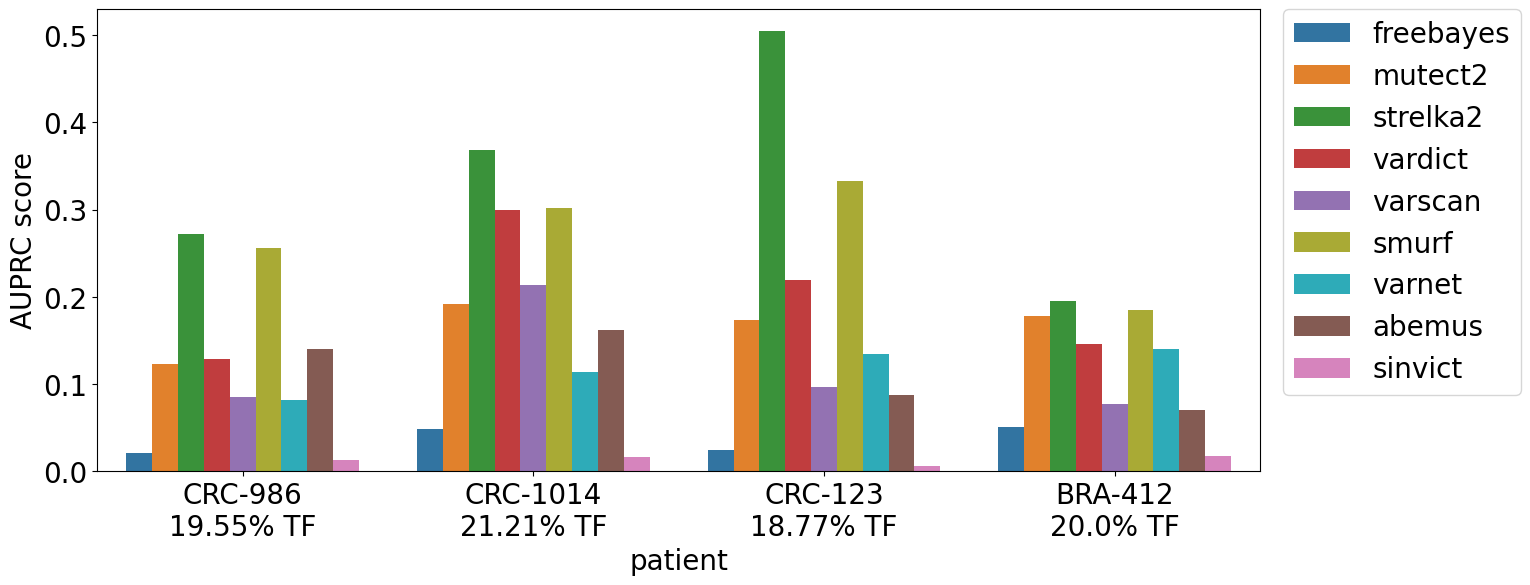

In [78]:
hightf_metric_all = pd.DataFrame()
for mixtureid in mixtureids:   
    hightf_metric = pd.read_csv('/Users/hanae/Repositories/cfdna_snv_benchmark/data/mixtures/mixtures_allchr/results/'+mixtureid+'_'+muttype+'_'+metric+'_inundilutedsamplebyatleast5callers_fixedcoverage_tb.csv', index_col=0)
    hightf_metric = hightf_metric[[metric.upper()+' score', 'tumor burden','caller']]
    if mixtureid.split('_')[0] == 'CRC-123':
        hightf_metric = hightf_metric.iloc[9:18]
    else:
        hightf_metric = hightf_metric.iloc[:9]
    hightf_metric['patient'] = mixtureid.split('_')[0] + '\n' + '{}% TF'.format(hightf_metric['tumor burden'].unique()[0])
    hightf_metric_all = pd.concat([hightf_metric_all, hightf_metric])
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=hightf_metric_all, x="patient", y=metric.upper()+" score", hue="caller", palette=[config.colors[mi] for mi, _ in enumerate(config.methods)])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.savefig('figures/supplfigure_cancertypeconsistency/hightf_auprc.svg', bbox_inches='tight')
#plt.savefig('figures/supplfigure_cancertypeconsistency/hightf_auprc.png', bbox_inches='tight')

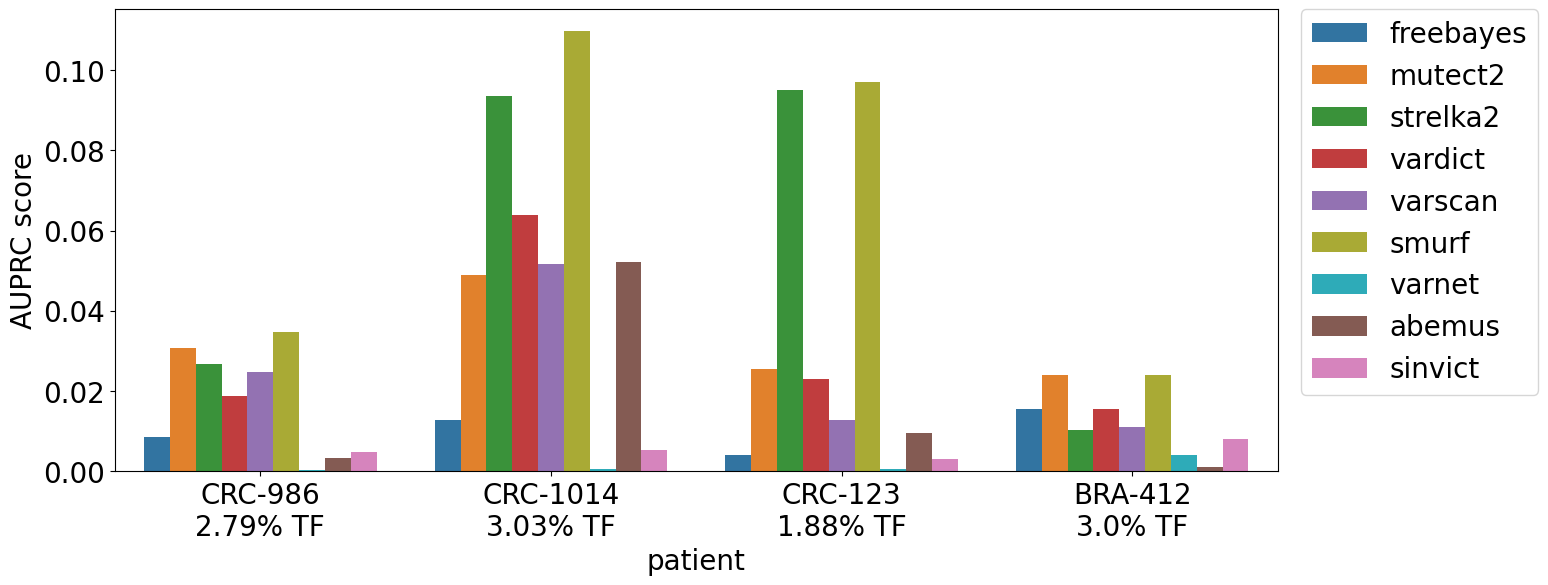

In [79]:
lowtf_metric_all = pd.DataFrame()
for mixtureid in mixtureids:   
    lowtf_metric = pd.read_csv('/Users/hanae/Repositories/cfdna_snv_benchmark/data/mixtures/mixtures_allchr/results/'+mixtureid+'_'+muttype+'_'+metric+'_inundilutedsamplebyatleast5callers_fixedcoverage_tb.csv', index_col=0)
    lowtf_metric = lowtf_metric[[metric.upper()+' score', 'tumor burden','caller']]
    if mixtureid.split('-')[0] == 'BRA' or mixtureid.split('_')[0] == 'CRC-1014' or mixtureid.split('_')[0] == 'CRC-123':
        lowtf_metric = lowtf_metric.iloc[-9:]
    else:
        lowtf_metric = lowtf_metric.iloc[-18:-9]
    lowtf_metric['patient'] = mixtureid.split('_')[0] + '\n' + '{}% TF'.format(lowtf_metric['tumor burden'].unique()[0])
    lowtf_metric_all = pd.concat([lowtf_metric_all, lowtf_metric])
f, ax = plt.subplots(figsize=(15, 6))
f = sns.barplot(data=lowtf_metric_all, x="patient", y=metric.upper()+" score", hue="caller", palette=[config.colors[mi] for mi, _ in enumerate(config.methods)])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('figures/supplfigure_cancertypeconsistency/lowtf_auprc.svg', bbox_inches='tight')
plt.savefig('figures/supplfigure_cancertypeconsistency/lowtf_auprc.png', bbox_inches='tight')